<a href="https://colab.research.google.com/github/shubhigupta991/Data-Science/blob/master/Deep%20Learning/end_to_end_dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐶 End-to-end Multil-class Dog Breed Classification

This notebook builds an end-to-end multi-class image classifier using TensorFlow 2.x and TensorFlow Hub.

## 1. Problem

Identifying the breed of a dog given an image of a dog.

When I'm sitting at the cafe and I take a photo of a dog, I want to know what breed of dog it is.

## 2. Data

The data we're using is from Kaggle's dog breed identification competition.

https://www.kaggle.com/c/dog-breed-identification/data 

## 3. Evaluation

The evaluation is a file with prediction probabilities for each dog breed of each test image.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## 4. Features

Some information about the data:
* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
* There are 120 breeds of dogs (this means there are 120 different classes).
* There are around 10,000+ images in the training set (these images have labels).
* There are around 10,000+ images in the test set (these images have no labels, because we'll want to predict them). 


### Get our workspace ready

* Import TensorFlow 2.x ✅
* Import TensorFlow Hub ✅
* Make sure we're using a GPU ✅

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
print('TF version : ', tf.__version__)
print('TF Hub version : ', hub.__version__)

TF version :  2.2.0
TF Hub version :  0.8.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Getting our data ready (turning into Tensors)

With all machine learning models, our data has to be in numerical format. So that's what we'll be doing first. Turning our images into Tensors (numerical representations).

Let's start by accessing our data and checking out the labels.

In [3]:
labels_csv = pd.read_csv('drive/My Drive/Data Science/labels.csv')
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [4]:
labels_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,b4d893d6a05c58cbbd9b8b5a0173bfce,scottish_deerhound
freq,1,126


In [5]:
labels_csv['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
komondor                 67
golden_retriever         67
brabancon_griffon        67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

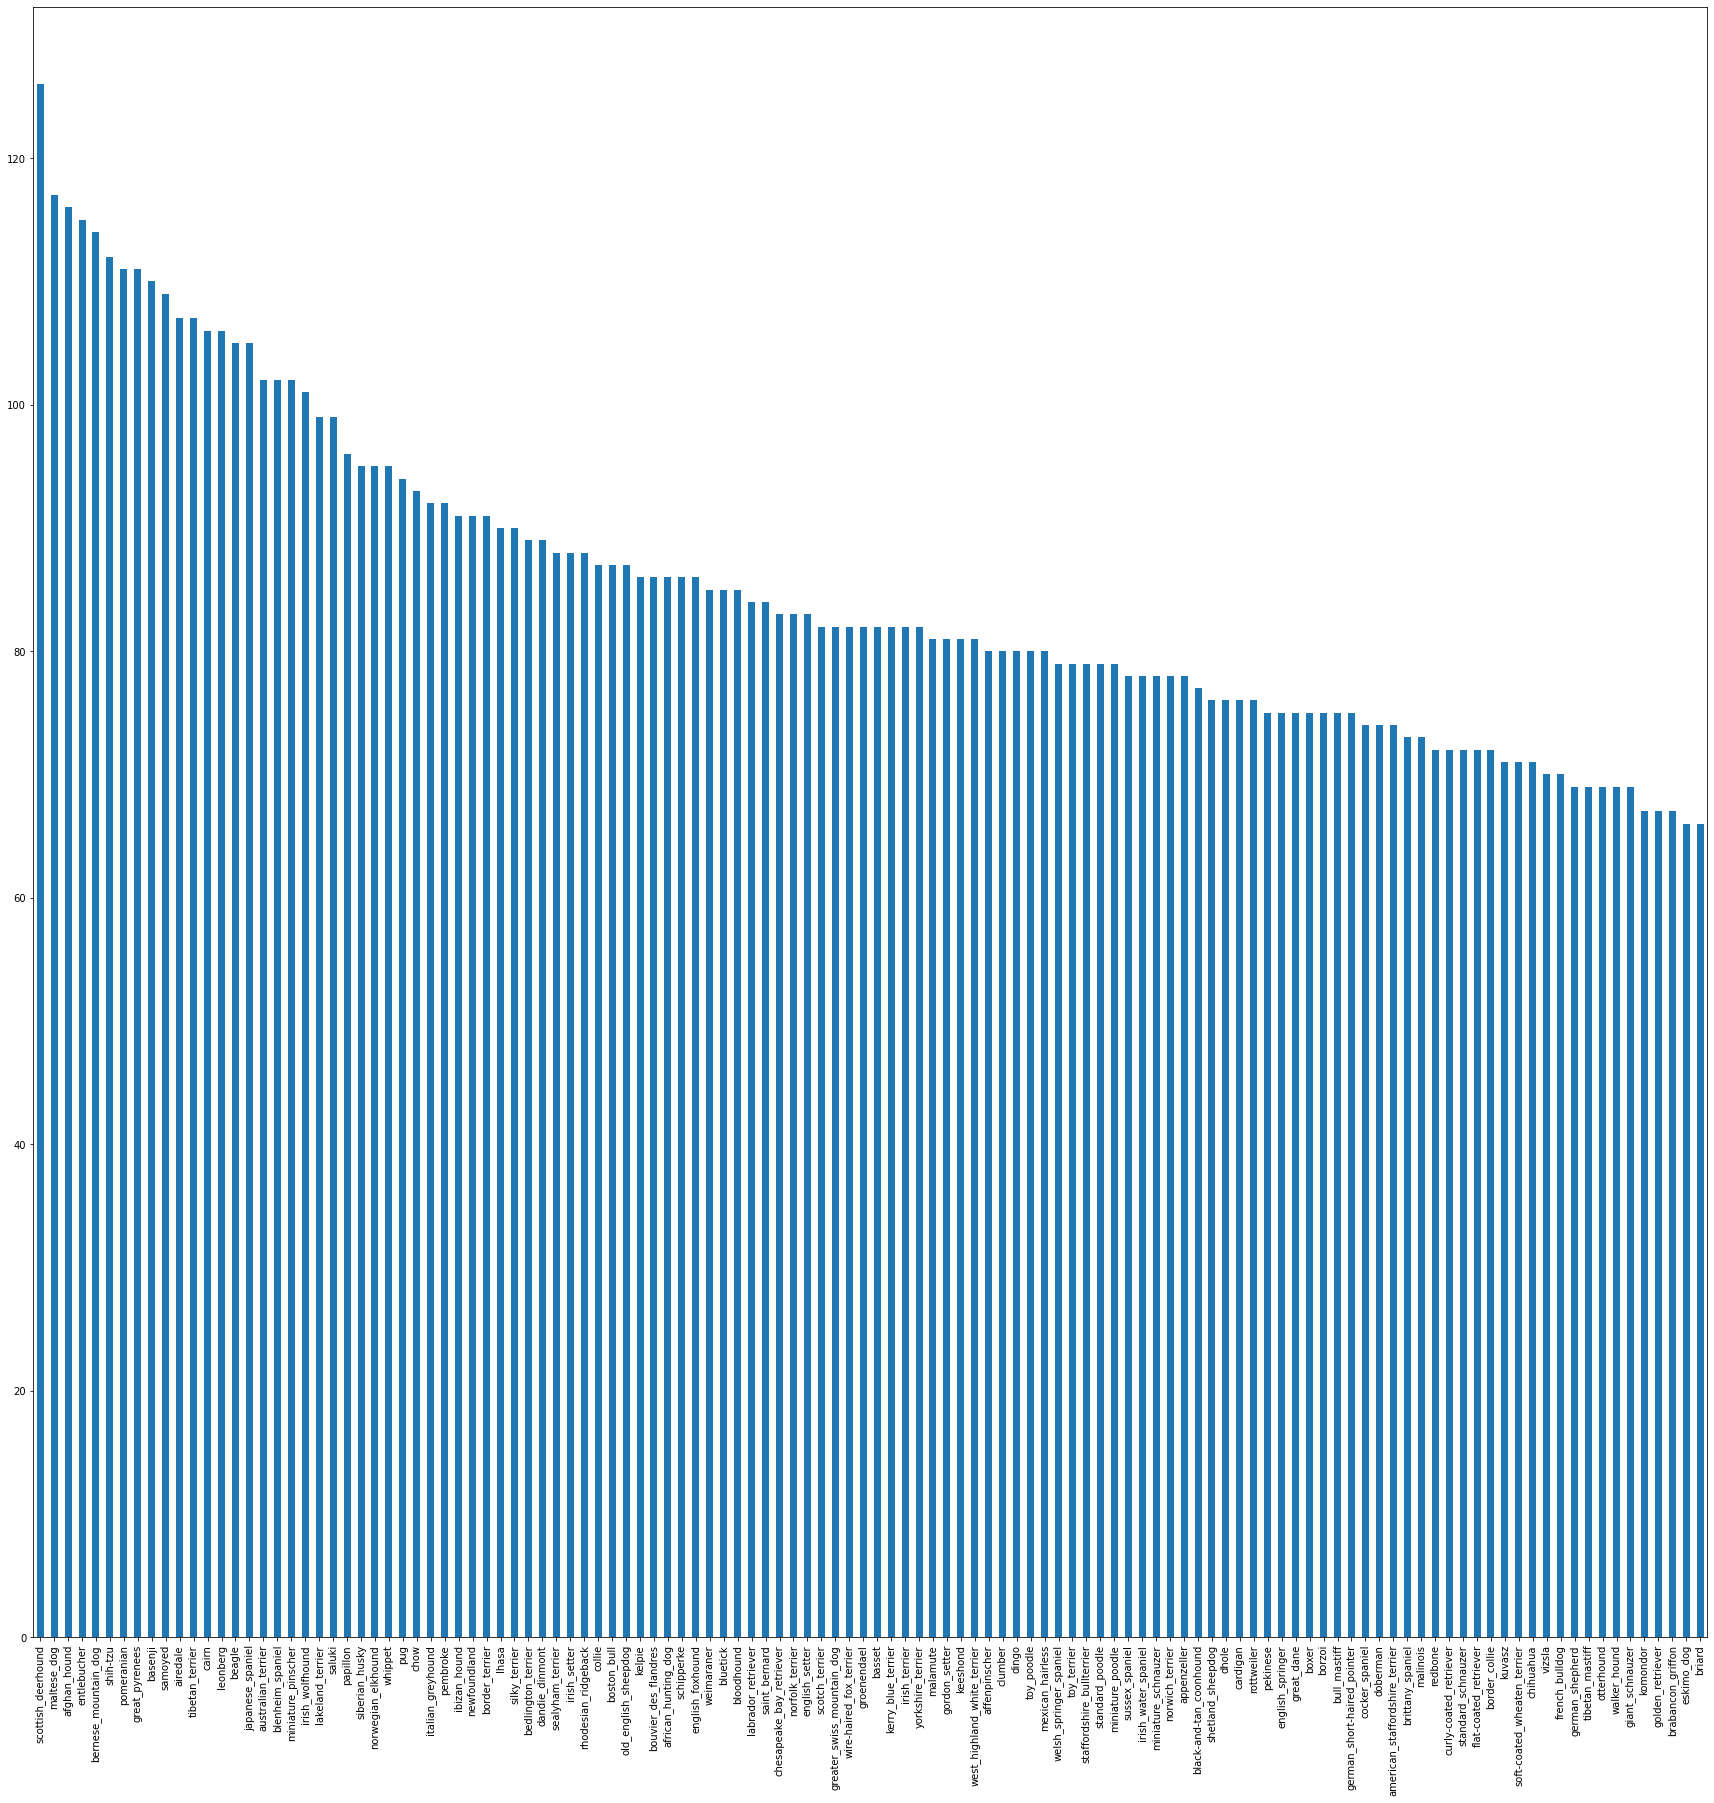

In [6]:
labels_csv['breed'].value_counts().plot.bar(figsize=(30,30))

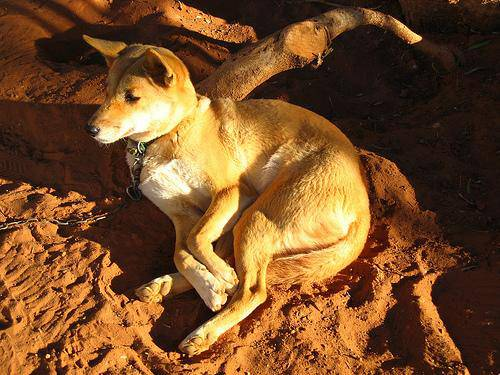

In [7]:
from IPython.display import Image
Image('drive/My Drive/Data Science/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg')

### Getting images and their labels 

Let's get a list of all of our image file pathnames.

In [8]:
filenames = ['drive/My Drive/Data Science/train/'+fname+ '.jpg' for fname in labels_csv['id']]

filenames[:10]

['drive/My Drive/Data Science/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Data Science/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Data Science/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Data Science/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Data Science/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Data Science/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Data Science/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Data Science/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Data Science/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Data Science/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

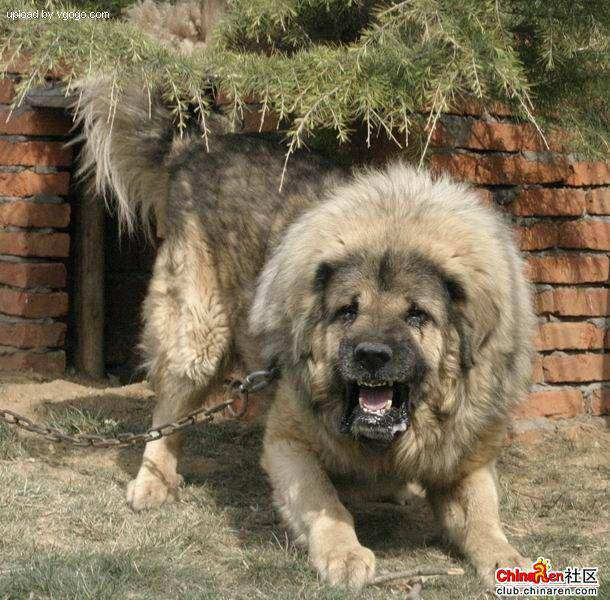

In [9]:
Image(filenames[9000])

In [10]:
labels_csv['breed'][9000]

'tibetan_mastiff'

In [11]:
import os
if len(os.listdir('drive/My Drive/Data Science/train/')) == len(filenames):
  print('Filenames match actual amount of Files!!!! Proceed.')
else:
  print('Filenames do not match actual data!! Check the target directory..')

Filenames match actual amount of Files!!!! Proceed.


In [12]:
labels = labels_csv['breed'].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [13]:
len(labels)

10222

In [14]:
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [15]:
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [16]:
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [17]:
len(boolean_labels)

10222

In [18]:
print(labels[0])
print(np.where(unique_breeds == labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [19]:
filenames[:10]

['drive/My Drive/Data Science/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Data Science/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Data Science/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Data Science/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Data Science/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Data Science/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Data Science/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Data Science/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Data Science/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Data Science/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

### Creating our own validation set
Since the dataset from Kaggle doesn't come with a validation set, we're going to create our own.

In [20]:
X = filenames
y = boolean_labels

In [21]:
len(X),len(y)

(10222, 10222)

In [22]:
NUM_IMAGES = 1000 #@param{type:'slider', min:1000, max:10000, step:1000}

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], y[:NUM_IMAGES],
                                                     test_size = 0.2, random_state = 9)
len(X_train), len(X_val), len(y_train), len(y_val)

(800, 200, 800, 200)

In [24]:
X_train[:2],y_train[:2]

(['drive/My Drive/Data Science/train/182c436dd1fbec1c5f4979077ce74659.jpg',
  'drive/My Drive/Data Science/train/145f7bb3bf6e4877b8b6624f612a1c24.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False,  True, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, Fals

## Preprocessing Images (turning images into Tensors)

To preprocess our images into Tensors we're going to write a function which does a few things:
1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable, `image`
3. Turn our `image` (a jpg) into Tensors
4. Normalize our image (convert color channel values from from 0-255 to 0-1).
5. Resize the `image` to be a shape of (224, 224)
6. Return the modified `image`

Before we do, let's see what importing an image looks like.

In [25]:
from matplotlib.pyplot import imread
image = imread(filenames[2])
image.shape

(375, 500, 3)

In [26]:
image[:2]

array([[[ 97,  96,  91],
        [102, 101,  96],
        [108, 107, 102],
        ...,
        [ 10,  12,  11],
        [ 10,  12,  11],
        [ 10,  12,  11]],

       [[ 99,  98,  93],
        [102, 101,  96],
        [108, 107, 102],
        ...,
        [ 18,  20,  19],
        [ 18,  20,  19],
        [ 18,  20,  19]]], dtype=uint8)

In [27]:
image.max(),image.min()

(255, 0)

In [28]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 500, 3), dtype=uint8, numpy=
array([[[ 97,  96,  91],
        [102, 101,  96],
        [108, 107, 102],
        ...,
        [ 10,  12,  11],
        [ 10,  12,  11],
        [ 10,  12,  11]],

       [[ 99,  98,  93],
        [102, 101,  96],
        [108, 107, 102],
        ...,
        [ 18,  20,  19],
        [ 18,  20,  19],
        [ 18,  20,  19]]], dtype=uint8)>

Now we've seen what an image looks like as a Tensor, let's make a function to preprocess them.

We'll create a function to:

1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable, `image`
3. Turn our `image` (a jpg) into Tensors
4. Normalize our image (convert color channel values from from 0-255 to 0-1).
5. Resize the `image` to be a shape of (224, 224)
6. Return the modified `image`

More information on loading images in TensorFlow can be seen here: https://www.tensorflow.org/tutorials/load_data/images

In [29]:
IMG_SIZE = 224

def process_image(image_path, img_size = IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor. 
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels = 3)
  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image,size = [img_size, img_size])
  return image

## Turning our data into batches

Why turn our data into batches?

Let's say you're trying to process 10,000+ images in one go... they all might not fit into memory.

So that's why we do about 32 (this is the batch size) images at a time (you can manually adjust the batch size if need be).

In order to use TensorFlow effectively, we need our data in the form of Tensor tuples which look like this: 
`(image, label)`.

In [30]:
def get_image_label(image_path, label):
  """
  Takes an image file path name and the assosciated label,
  processes the image and reutrns a typle of (image, label).
  """
  image = process_image(image_path)
  return image,label

Now we've got a way to turn our data into tuples of Tensors in the form: `(image, label)`, let's make a function to turn all of our data (`X` & `y`) into batches!

In [31]:
BATCH_SIZE = 32

def create_data_batches(X , y = None, batch_size = BATCH_SIZE, valid_data = False, test_data = False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  if test_data:
    print('Creating test data batches........')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(process_image).batch(batch_size)
    return data_batch
  
  elif valid_data:
    print('Creating valid data batches...........')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
    data_batch = data.map(get_image_label).batch(batch_size)
    return data_batch
  
  else:
    print('Creating training data batches...............')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
    data = data.shuffle(buffer_size = len(X))
    data_batch = data.map(get_image_label).batch(batch_size)
    return data_batch

In [32]:
train_data = create_data_batches(X_train,y_train)
valid_data = create_data_batches(X_val,y_val, valid_data=True)

Creating training data batches...............
Creating valid data batches...........


In [33]:
train_data.element_spec, valid_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [34]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [35]:
valid_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

## Visualizing Data Batches

Our data is now in batches, however, these can be a little hard to understand/comprehend, let's visualize them!

In [36]:
def show_25_images(images,labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  plt.figure(figsize=(10,10))

  for i in range(25):
    ax = plt.subplot(5,5,i+1)
    # Display an image 
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis('off')

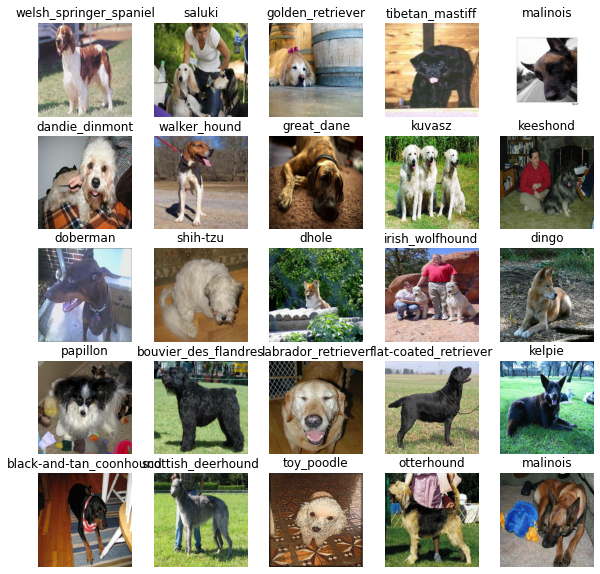

In [37]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images,train_labels)

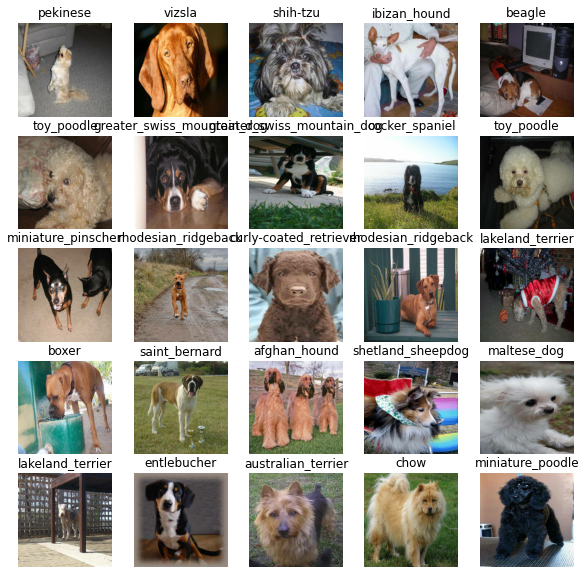

In [38]:
valid_images, valid_labels = next(valid_data.as_numpy_iterator())
show_25_images(valid_images,valid_labels)